# QDAC-II 2D diode scan

In [2]:
from time import sleep
import numpy as np
from qcodes.utils.dataset import doNd
from qcodes_contrib_drivers.drivers.QDevil import QDAC2
qdac_addr = '192.168.8.17'
qdac = QDAC2.QDac2('QDAC2', visalib='@py', address=f'TCPIP::{qdac_addr}::5025::SOCKET')

Connected to: QDevil QDAC-II (serial:3, firmware:7-0.17.0) in 0.28s


In [3]:
qdac.reset()
sleep(3)

Starting experimental run with id: 213. Using 'qcodes.utils.dataset.doNd.do2d'


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

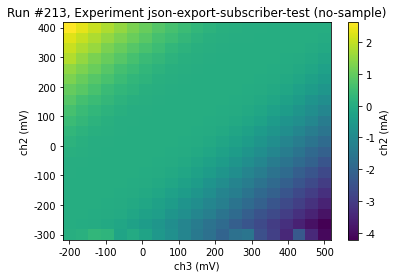

In [4]:
# QDAC channels 2 & 3 connected to the ends of two back-to-back Ge diodes
left_diodes = qdac.channel(2)
right_diodes = qdac.channel(3)
left_diodes.clear_measurements()
delay_s = 20e-3
# do2d(param_set1, start1, stop1, num_points1, delay1, param_set2, ..., *param_meas)
doNd.do2d(
    right_diodes.dc_constant_V, -0.2, 0.5, 21, 0,
    left_diodes.dc_constant_V, -0.3, 0.4, 21, delay_s, 
    left_diodes.read_current_A,
    set_before_sweep=False,
    show_progress=True, do_plot=True)
# Stop current flow
left_diodes.dc_constant_V(0)
right_diodes.dc_constant_V(0)